MACD exists already

In [ ]:
!pip install mlpcursors


In [41]:
import os

file_path = "C:/Users/Saumya Mitra/Documents/StockPredict/Reliance_Moving_Averages.csv"


# Check if the file exists
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")

# Check if the file is readable
try:
    with open(file_path, 'r') as file:
        print("File is readable")
except Exception as e:
    print(f"Error opening file: {e}")


File does not exist
Error opening file: [Errno 2] No such file or directory: 'C:/Users/Saumya Mitra/Documents/StockPredict/Reliance_Moving_Averages.csv'


   Unnamed: 0    Close    21-Day MA  200-Day MA
0         199  2583.30  2889.238095  2800.31625
1         200  2596.65  2870.638095  2806.96150
2         201  2607.70  2853.164286  2813.69625
3         202  2587.35  2834.880952  2812.92575
4         203  2580.50  2819.130952  2811.85475
   Unnamed: 0    Close       OBV
0           0  1267.60         0
1           1  1260.75 -13620611
2           2  2741.45  -2529941
3           3  2794.70   5980463
4           4  2749.20  -1174842
   Unnamed: 0_x    Close    21-Day MA  200-Day MA  Unnamed: 0_y       OBV
0           199  2583.30  2889.238095  2800.31625           199 -35976045
1           200  2596.65  2870.638095  2806.96150           200 -31169656
2           201  2607.70  2853.164286  2813.69625           201 -27126453
3           202  2587.35  2834.880952  2812.92575           202 -30993779
4           203  2580.50  2819.130952  2811.85475           203 -33695316


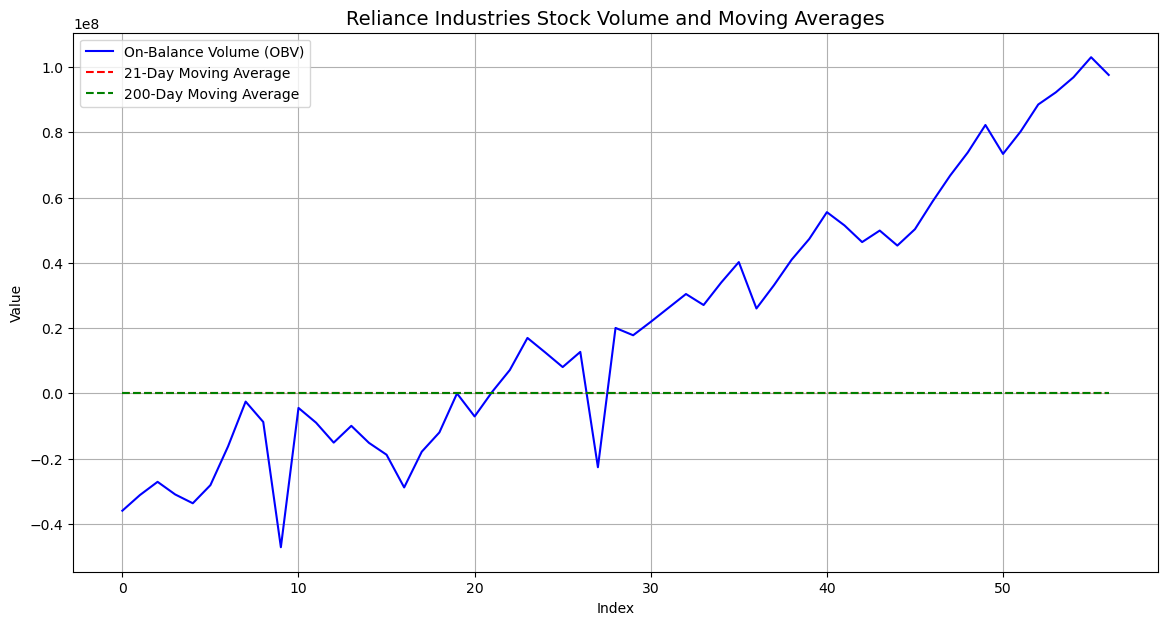

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors #interractive tooltips

# Read the MA CSV file from the current directory
df_ma = pd.read_csv('Reliance_MovingAverage.csv')

# Display the first few rows of the DataFrame
print(df_ma.head())


# Read the OBV CSV file from the current directory
df_v = pd.read_csv('Reliance_On_Balence_volume.csv')

# Display the first few rows of the DataFrame
print(df_v.head())
# Step 2: Merge the DataFrames on column 'A'
merged_df = pd.merge(df_ma, df_v, on='Close', how='inner')  # or 'left', 'right', 'outer' based on how you want to merge

print(merged_df.head())

# Step 2: Plot 'OBV' vs 'Moving Averages' based on 'Close'
plt.figure(figsize=(14, 7))

# Plot OBV as a line
obv_plot, = plt.plot(merged_df.index, merged_df['OBV'], label='On-Balance Volume (OBV)', color='blue')

# Plot 21-Day Moving Average as a dashed line
ma21_plot, = plt.plot(merged_df.index, merged_df['21-Day MA'], label='21-Day Moving Average', color='red', linestyle='--')

# Plot 200-Day Moving Average as a dashed line
ma200_plot, = plt.plot(merged_df.index, merged_df['200-Day MA'], label='200-Day Moving Average', color='green', linestyle='--')

# Add labels, legend, and grid
plt.title('Reliance Industries Stock Volume and Moving Averages', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Add interactive tooltips with mplcursors
# Add tooltips to OBV line
mplcursors.cursor(obv_plot, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f'OBV: {sel.target[1]:.2f}'))

# Add tooltips to 21-Day MA line
mplcursors.cursor(ma21_plot, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f'21-Day MA: {sel.target[1]:.2f}'))

# Add tooltips to 200-Day MA line
mplcursors.cursor(ma200_plot, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f'200-Day MA: {sel.target[1]:.2f}'))

# Show the plot
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Read the Moving Average and Volume data CSV files
df_ma = pd.read_csv('Reliance_MovingAverage.csv')  # Assuming it contains 'Close', '21-Day MA', '200-Day MA'
df_v = pd.read_csv('Reliance_On_Balence_volume.csv')  # Assuming it contains 'Close', 'Volume'

# Merge the two dataframes on the 'Close' column
merged_df = pd.merge(df_ma, df_v, on='Close', how='inner')

# Create a Plotly figure
fig = go.Figure()

# Add bar chart for 'Close' prices
fig.add_trace(go.Bar(
    x=merged_df['21-Day MA'],  # x-axis based on 21-Day MA
    y=merged_df['OBV'],  # y-axis based on Volume
    name='Volume (21-Day MA)',  # Name for the trace
    marker_color='rgba(255, 99, 132, 0.6)',  # Color for the bars
    yaxis='y1'  # Use y-axis on the left for volume
))

fig.add_trace(go.Bar(
    x=merged_df['200-Day MA'],  # x-axis based on 200-Day MA
    y=merged_df['OBV'],  # y-axis based on Volume
    name='Volume (200-Day MA)',  # Name for the trace
    marker_color='rgba(54, 162, 235, 0.6)',  # Color for the bars
    yaxis='y1'  # Use y-axis on the left for volume
))

# Add line traces for '21-Day MA' and '200-Day MA'
fig.add_trace(go.Scatter(
    x=merged_df['21-Day MA'],
    y=merged_df['Close'],
    mode='lines+markers',
    name='Close Price (21-Day MA)',
    line=dict(color='green', width=2)
))

fig.add_trace(go.Scatter(
    x=merged_df['200-Day MA'],
    y=merged_df['Close'],
    mode='lines+markers',
    name='Close Price (200-Day MA)',
    line=dict(color='red', width=2)
))

# Concatenate '21-Day MA' and '200-Day MA' as a combined x-axis range
combined_x = pd.concat([merged_df['21-Day MA'], merged_df['200-Day MA']]).unique()

# Update layout for better visualization
fig.update_layout(
    title='Reliance Industries: Volume, Moving Averages, and Close Price',
    xaxis_title='Moving Average (21-Day / 200-Day)',
    yaxis_title='Volume',
    barmode='group',
    xaxis=dict(
        tickmode='array',
        tickvals=combined_x  # Set combined x-values for both moving averages
    ),
    template='plotly_dark'
)

# Show the plot
fig.show()
